In [1]:
import pickle
import pandas as pd
from helpermodules.correlation_study import CorrelationAnalysis

# Load the pickle file
with open('data/pickle_files/cleaned_nasdaq_dataframe.pkl', 'rb') as file:
    df = pickle.load(file)



In [2]:

# Get list of tickers from DataFrame columns
tickers = df.columns.tolist()
# Exclude the ticker 'GOOG' from the tickers list
tickers.remove('GOOG')
# Drop the 'GOOG' column from the DataFrame
df = df.drop(columns=['GOOG'])

In [ ]:
#make stationary

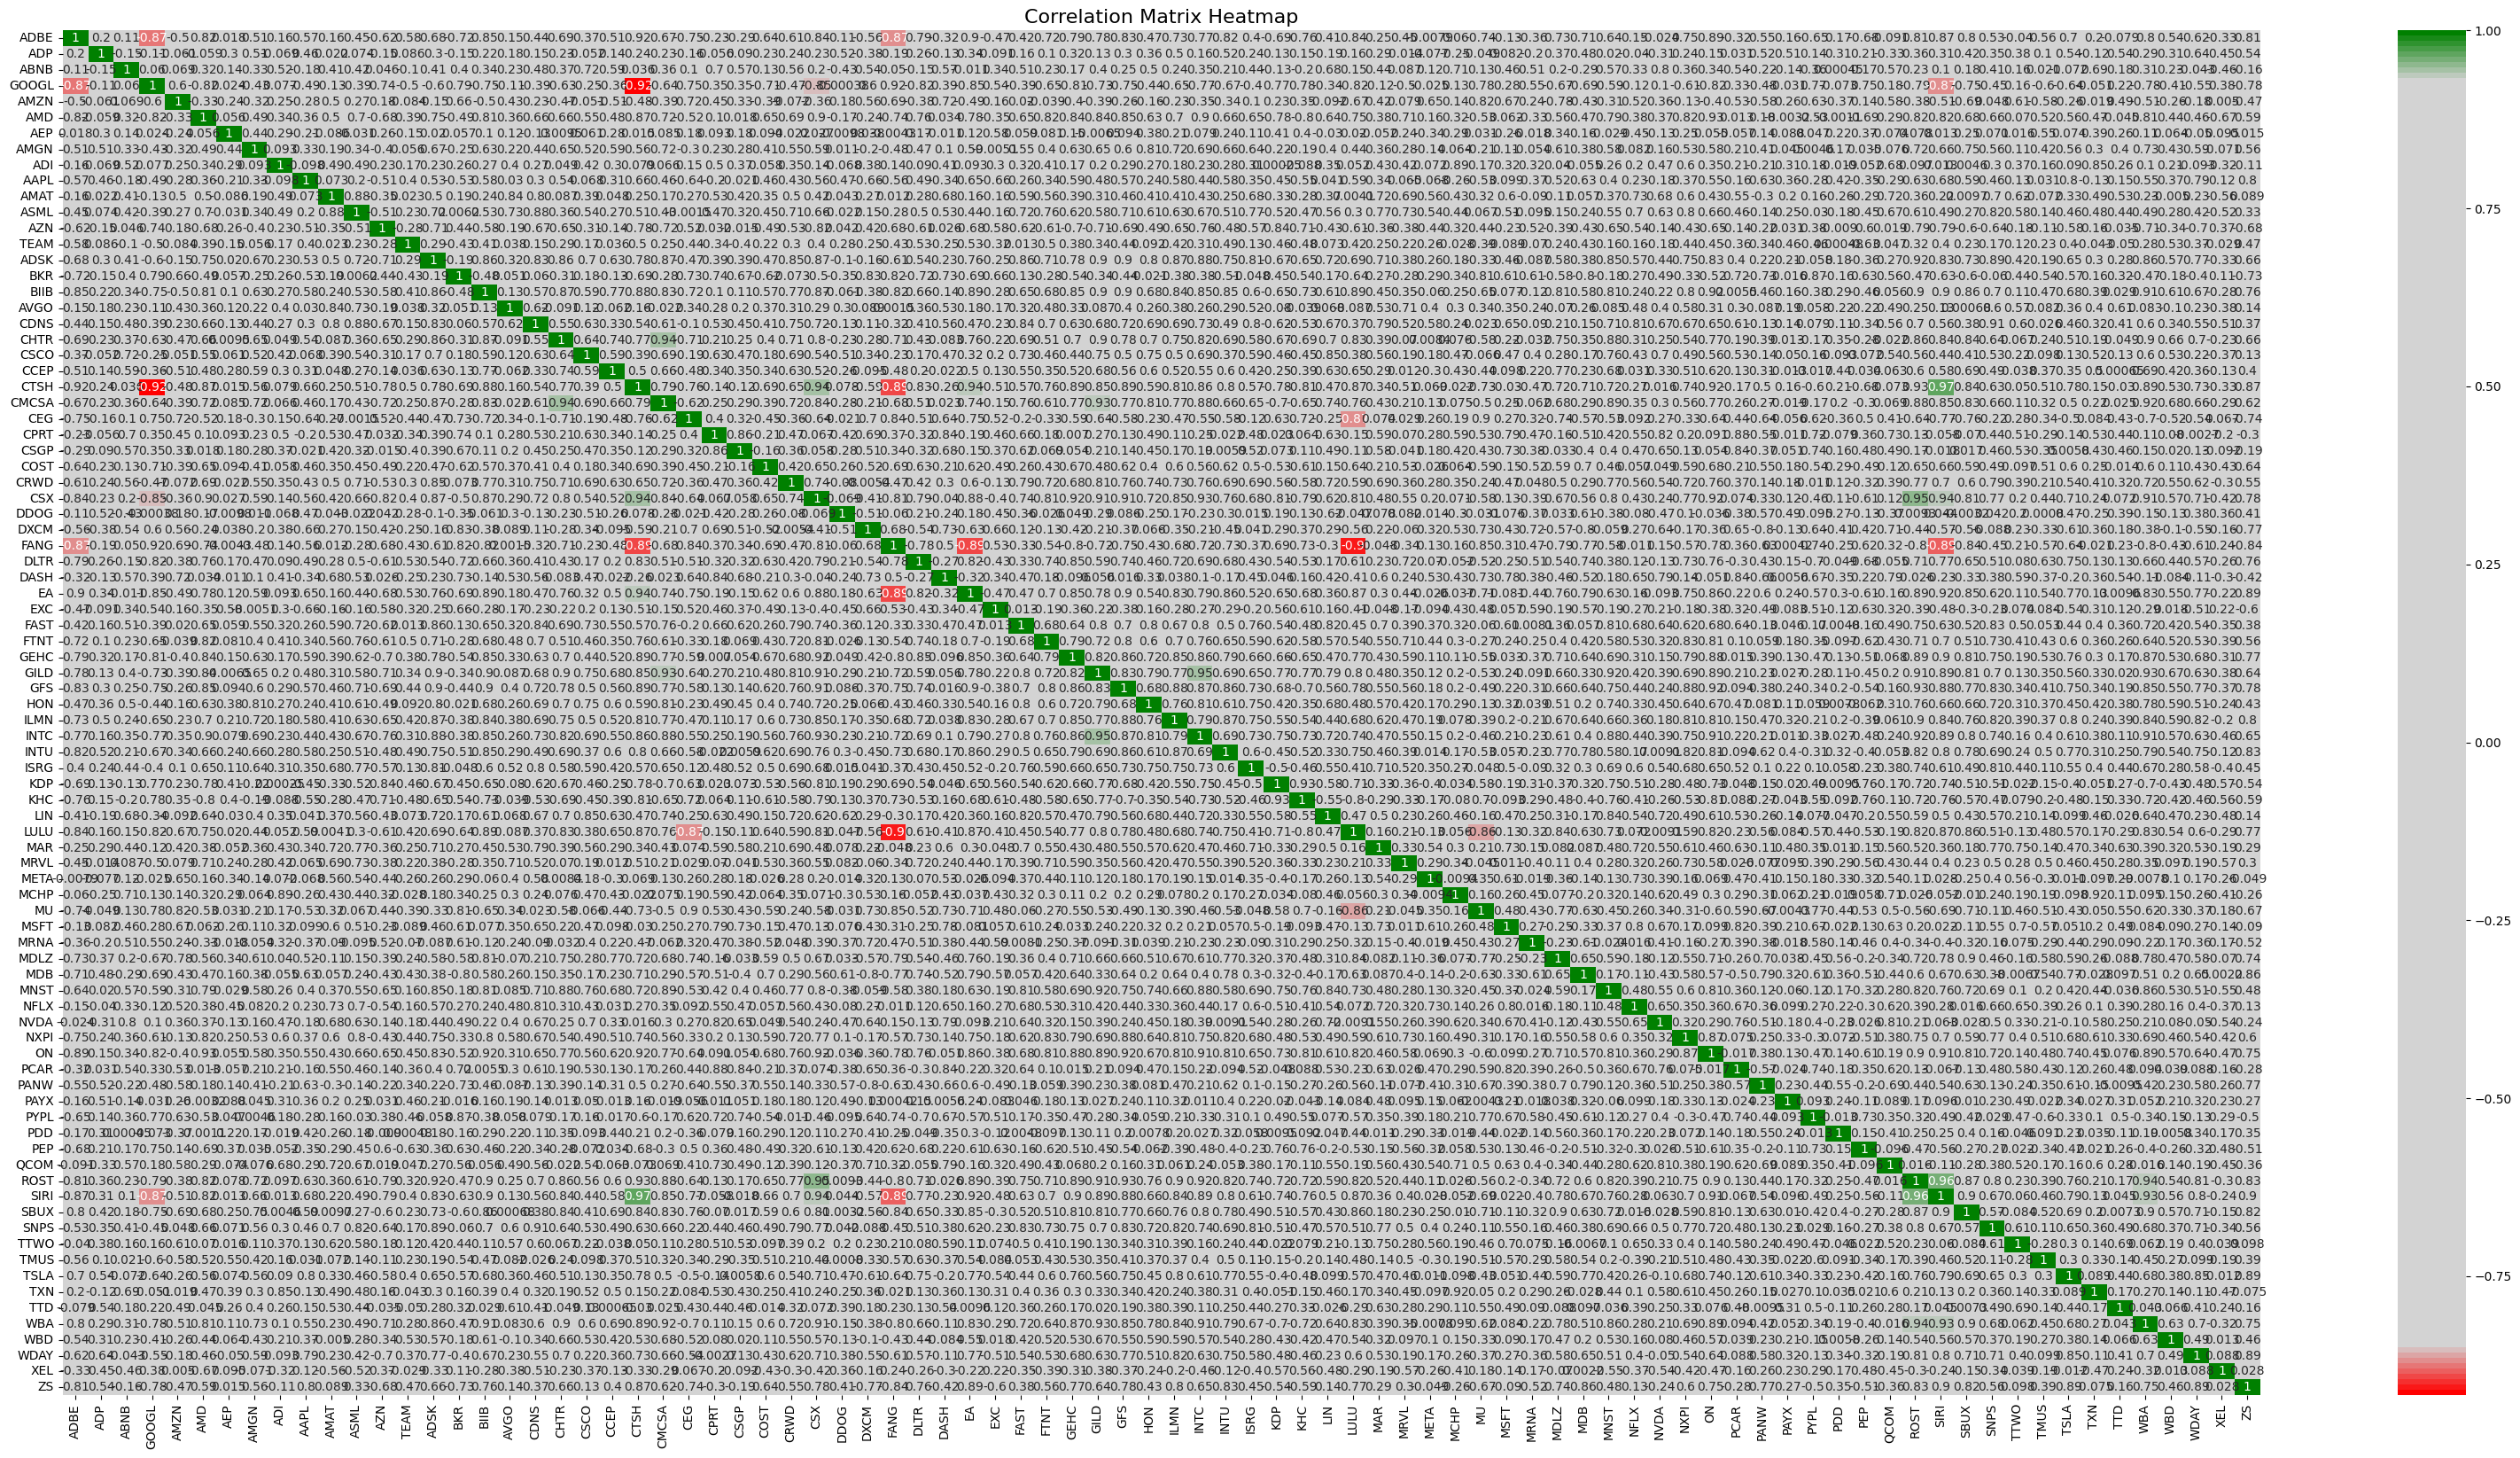

Most correlated pair: ['CTSH', 'SIRI'] with correlation: 0.9679947326234023
Most correlated pair: ['CTSH', 'SIRI']


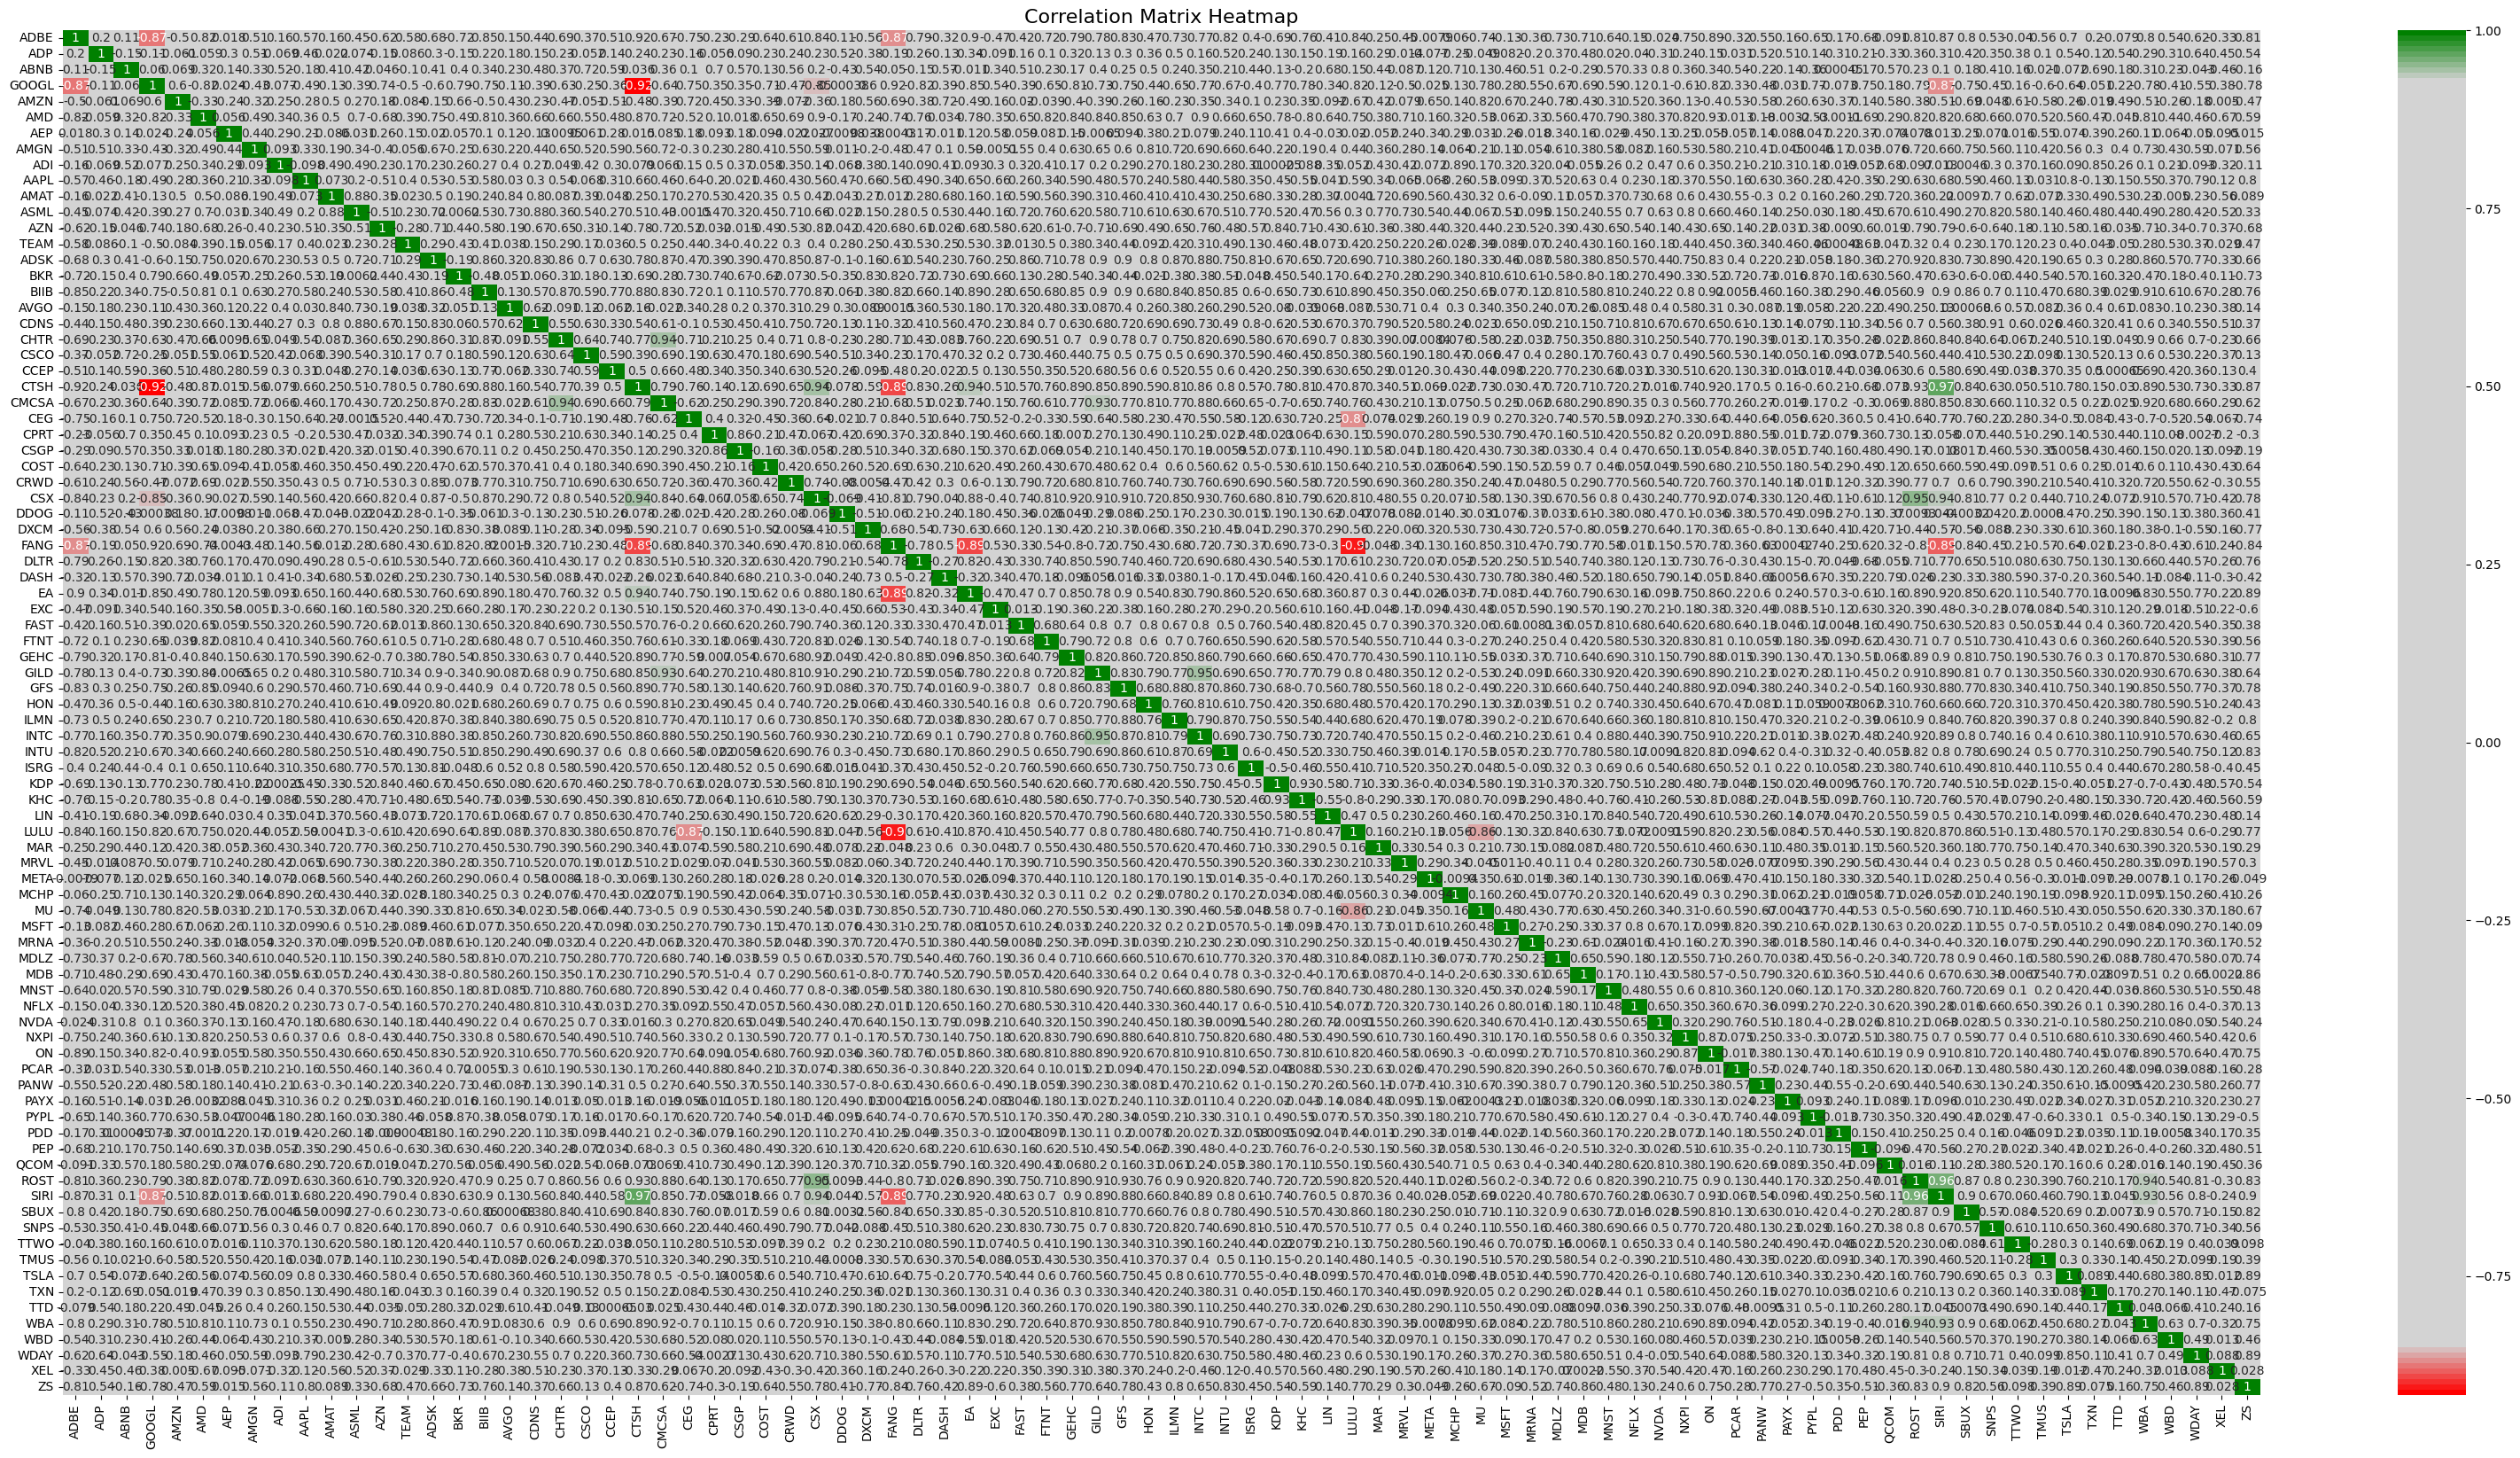

Most correlated pair: ['CTSH', 'SIRI'] with correlation: 0.9679947326234023
Pickle file saved for the final dataframe: final_dataframe.pkl

DataFrame with rolling correlation:
                      CTSH  correlation    SIRI  correlation
2024-02-26 09:45:00  78.93          NaN  4.5735          NaN
2024-02-26 09:46:00  78.93          NaN  4.5735          NaN
2024-02-26 09:47:00  78.93          NaN  4.5735          NaN
2024-02-26 09:48:00  78.93          NaN  4.5735          NaN
2024-02-26 09:49:00  78.93          NaN  4.5735          NaN


c:\Users\giuli\Repositories\nasdaq_causal-analysis_lstm\helpermodules\correlation_study.py:282: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_stock1['correlation'] = df_stock1['correlation'].fillna(method=fillna_method)
c:\Users\giuli\Repositories\nasdaq_causal-analysis_lstm\helpermodules\correlation_study.py:283: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_stock2['correlation'] = df_stock2['correlation'].fillna(method=fillna_method)


In [3]:
# Initialize CorrelationAnalysis with DataFrame and tickers
correlation_analyzer = CorrelationAnalysis(df, tickers)

# Find the most correlated pair
# This will also save correlation results and create visualizations
most_correlated_pair = correlation_analyzer.top3_corrstocks()

print(f"Most correlated pair: {most_correlated_pair}")

# Optional: If you want to get the rolling correlation analysis for this pair
df_with_correlation = correlation_analyzer.winner_rollingcorrelation()

# Print first few rows of the combined DataFrame with correlation
print("\nDataFrame with rolling correlation:")
print(df_with_correlation.head())

In [5]:
# Load the pickle file
with open('data/pickle_files/final_dataframe.pkl', 'rb') as file:
    final_df = pickle.load(file)

# Display the information of the DataFrame
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17432 entries, 2024-02-26 09:45:00 to 2024-02-26 15:25:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CTSH         17432 non-null  float64
 1   correlation  17101 non-null  float64
 2   SIRI         17432 non-null  float64
 3   correlation  17101 non-null  float64
dtypes: float64(4)
memory usage: 680.9 KB


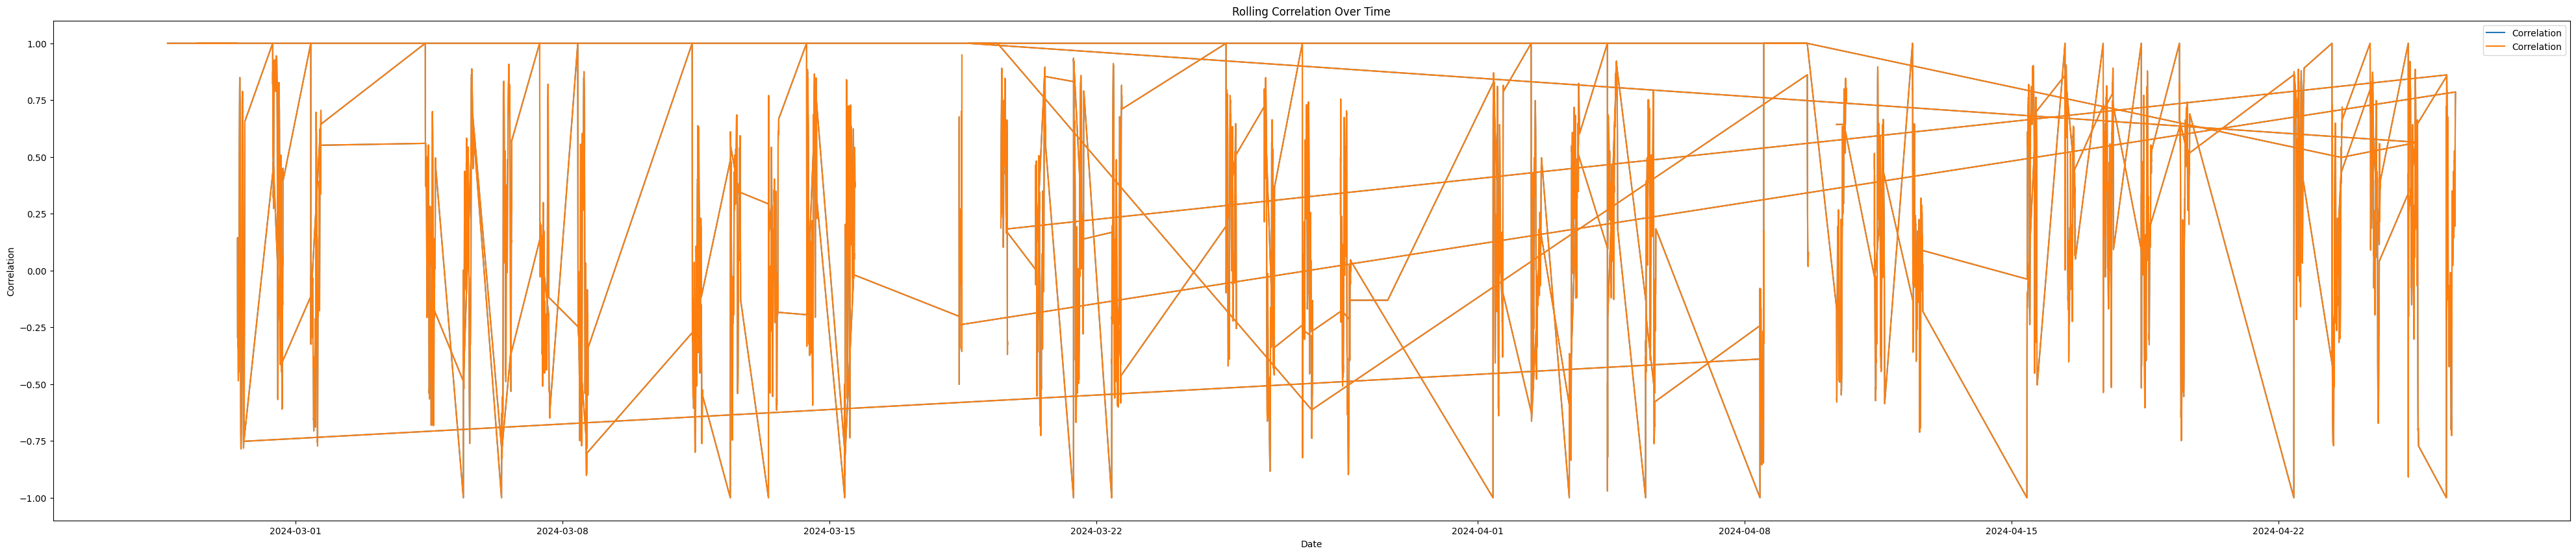

In [9]:
import matplotlib.pyplot as plt

# Plot the correlation column
plt.figure(figsize=(50, 10))
plt.plot(df_with_correlation.index, df_with_correlation['correlation'], label='Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.title('Rolling Correlation Over Time')
plt.legend()
plt.show()